In [22]:
pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("clean_chicago_traffic.csv")

In [26]:
df.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,Crash Date,Crash Time,Police Date,Police Time
0,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952),2023-07-29,14:45:00,2023-07-29,14:45:00
1,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2023-08-18,17:58:00,2023-08-18,18:01:00
2,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,UNKNOWN,...,14,7,7,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018),2023-07-29,14:30:00,2023-08-03,13:55:00
3,161ff459c7fff8e1359204d1c54db502674fdfbf7036a9...,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,12,4,9,41.744152,-87.585945,POINT (-87.585945066953 41.744151639042),2023-09-20,12:57:00,2023-09-20,16:00:00
4,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,19,4,8,41.758246,-87.626522,POINT (-87.626521907009 41.758245504966),2023-08-09,19:55:00,2023-08-09,20:00:00


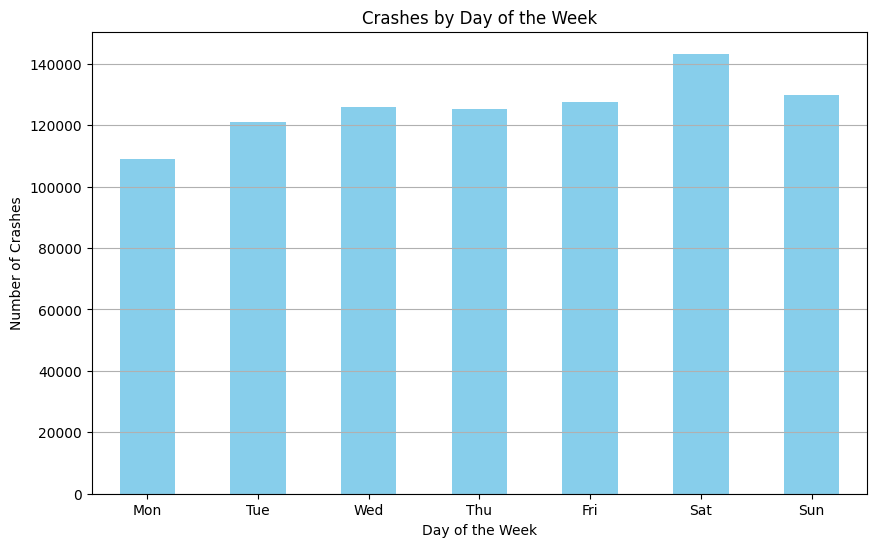

In [27]:
#df = pd.read_csv('crashes.csv')

# Count the number of crashes by day of the week
crash_by_day = df['CRASH_DAY_OF_WEEK'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
crash_by_day.plot(kind='bar', color='skyblue')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y')
plt.show()

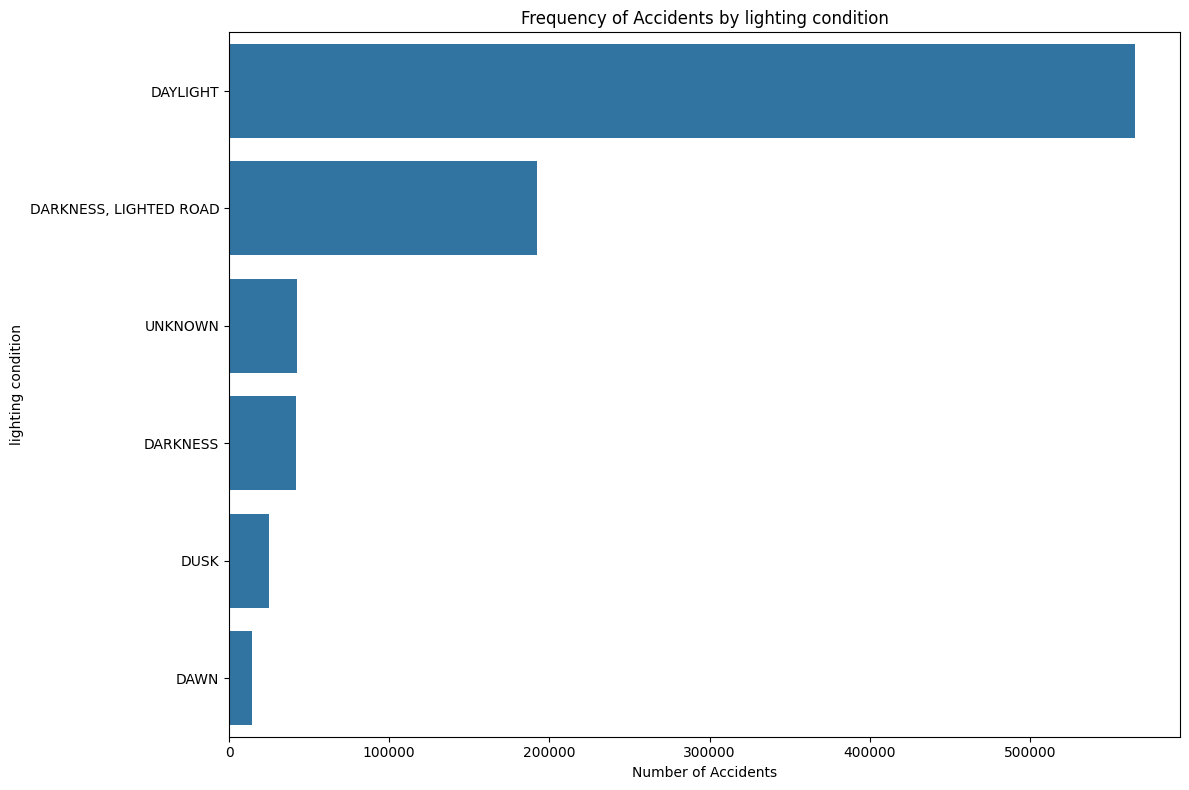

In [28]:
location_counts = df['LIGHTING_CONDITION'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 8))  # Adjust figure size for horizontal bars
sns.barplot(x=location_counts.values, y=location_counts.index, orient='h')
plt.title('Frequency of Accidents by lighting condition')
plt.xlabel('Number of Accidents')
plt.ylabel('lighting condition')
plt.tight_layout()
plt.show()

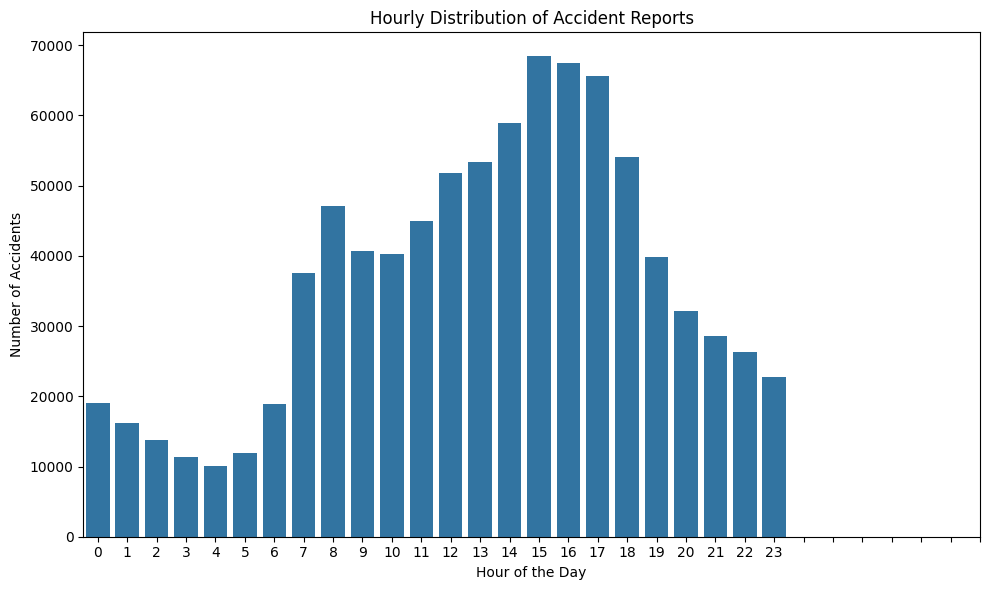

In [40]:
hourly_counts = df['CRASH_HOUR'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Hourly Distribution of Accident Reports')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 31))  # Ensure all hours are shown
plt.tight_layout()
plt.show()

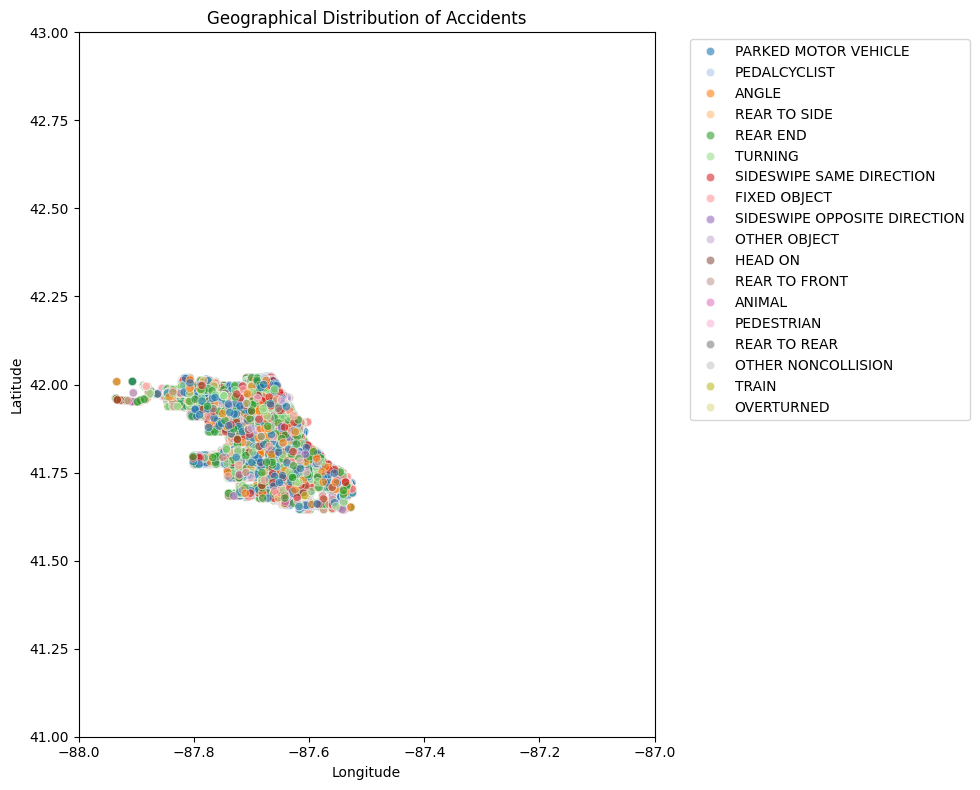

In [45]:
# Plot a scatter plot for geographical distribution
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, hue='FIRST_CRASH_TYPE', palette='tab20', alpha=0.6)
plt.title('Geographical Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim([41, 43])
plt.xlim([-88, -87])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

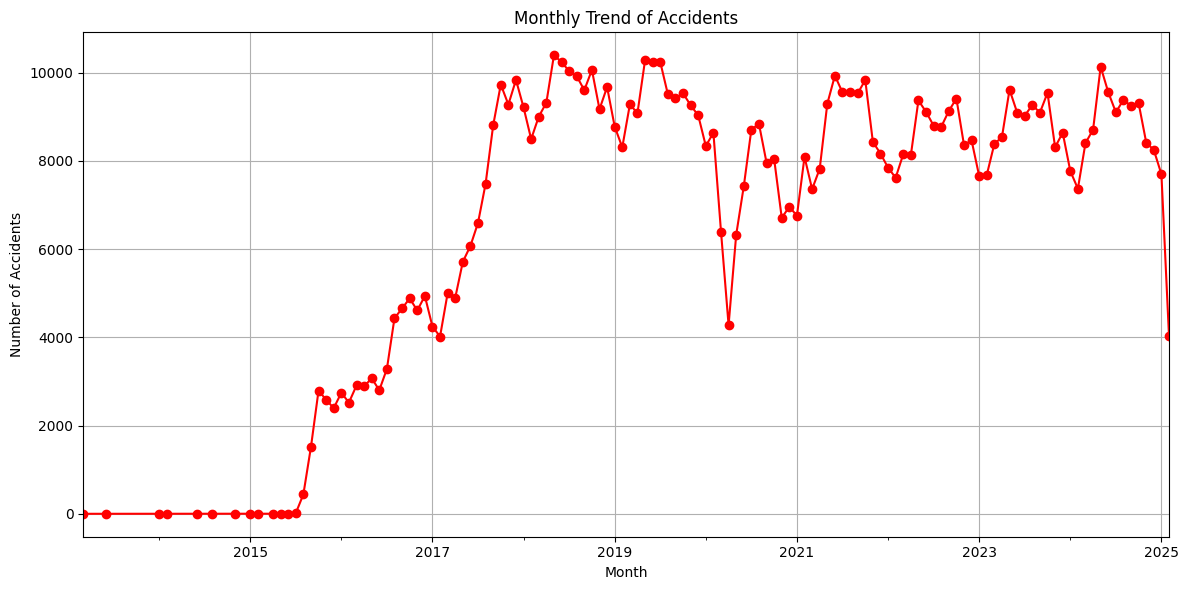

In [31]:

df['Crash Date'] = pd.to_datetime(df['Crash Date'])
df['Crash Month'] = df['Crash Date'].dt.to_period('M')


monthly_counts = df['Crash Month'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color='r')
plt.title('Monthly Trend of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

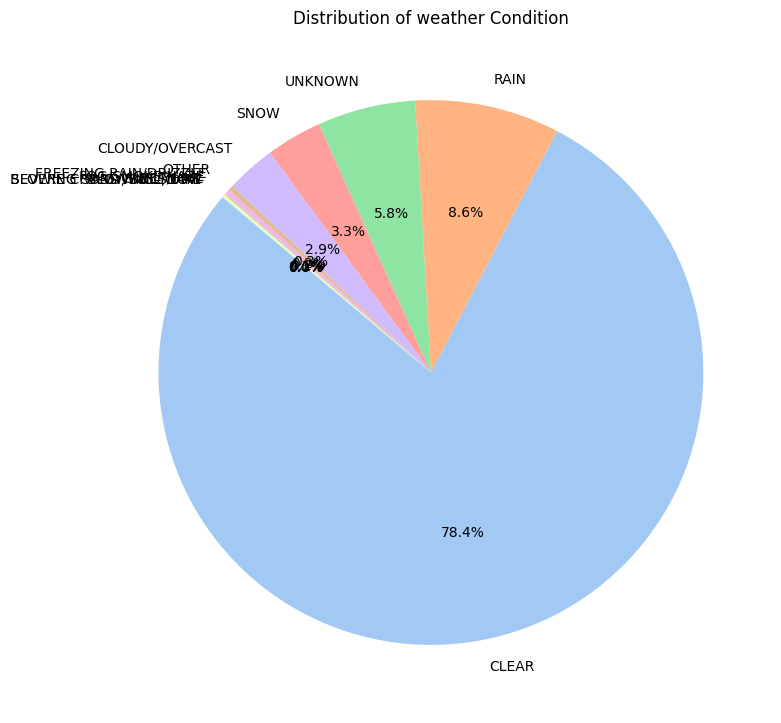

In [33]:
offence_counts = df['WEATHER_CONDITION'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(offence_counts, labels=offence_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of weather Condition')
plt.tight_layout()
plt.show()

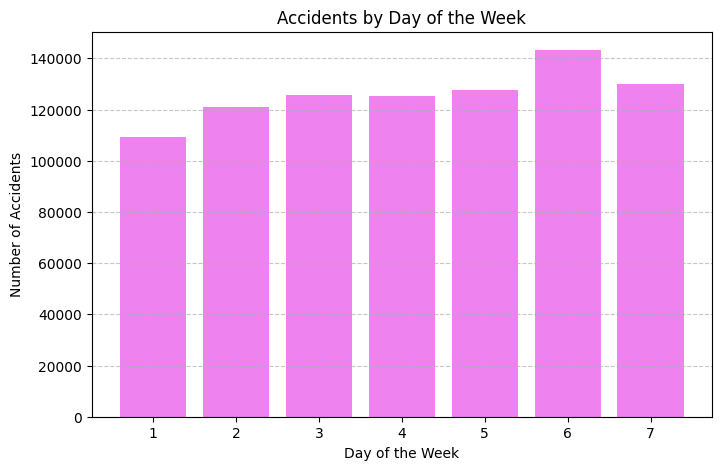

CRASH_DAY_OF_WEEK
6    143235
7    129958
5    127492
3    125729
4    125218
2    120871
1    109092
Name: count, dtype: int64

In [36]:

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


day_counts = df["CRASH_DAY_OF_WEEK"].value_counts()


# Plot
plt.figure(figsize=(8, 5))
plt.bar(day_counts.index, day_counts.values, color="violet")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
day_counts

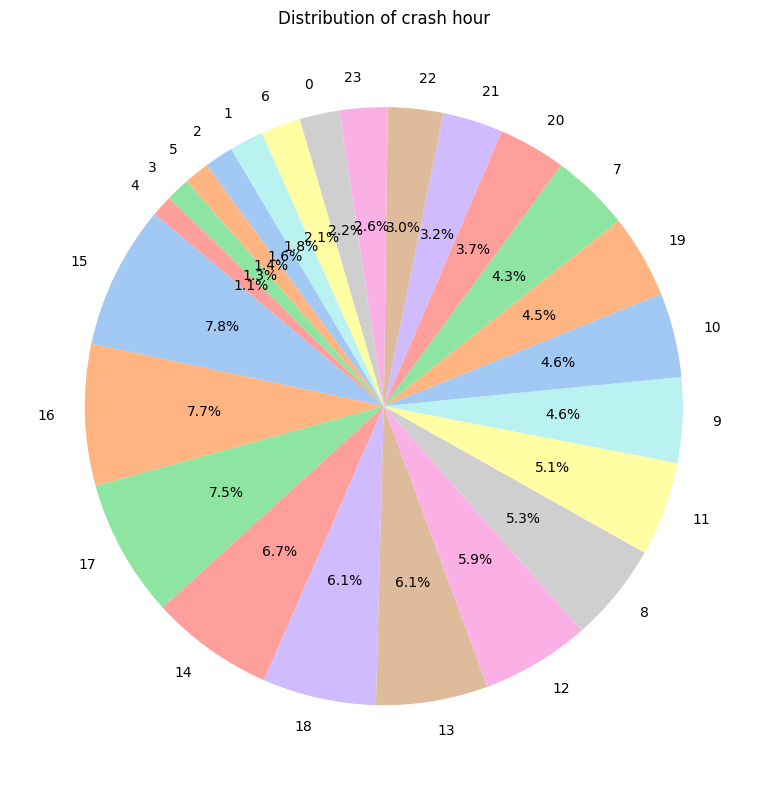

In [37]:
offence_counts = df['CRASH_HOUR'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(offence_counts, labels=offence_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of crash hour')
plt.tight_layout()
plt.show()

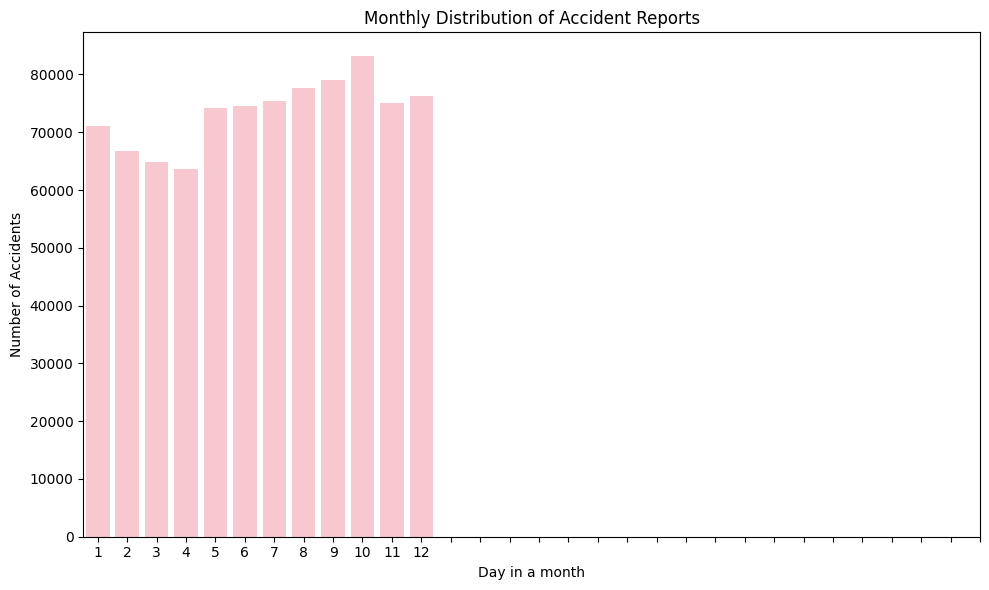

In [43]:

hourly_counts = df['CRASH_MONTH'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color="pink")
plt.title('Monthly Distribution of Accident Reports')
plt.xlabel('Day in a month')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 31))  # Ensure all hours are shown
plt.tight_layout()
plt.show()

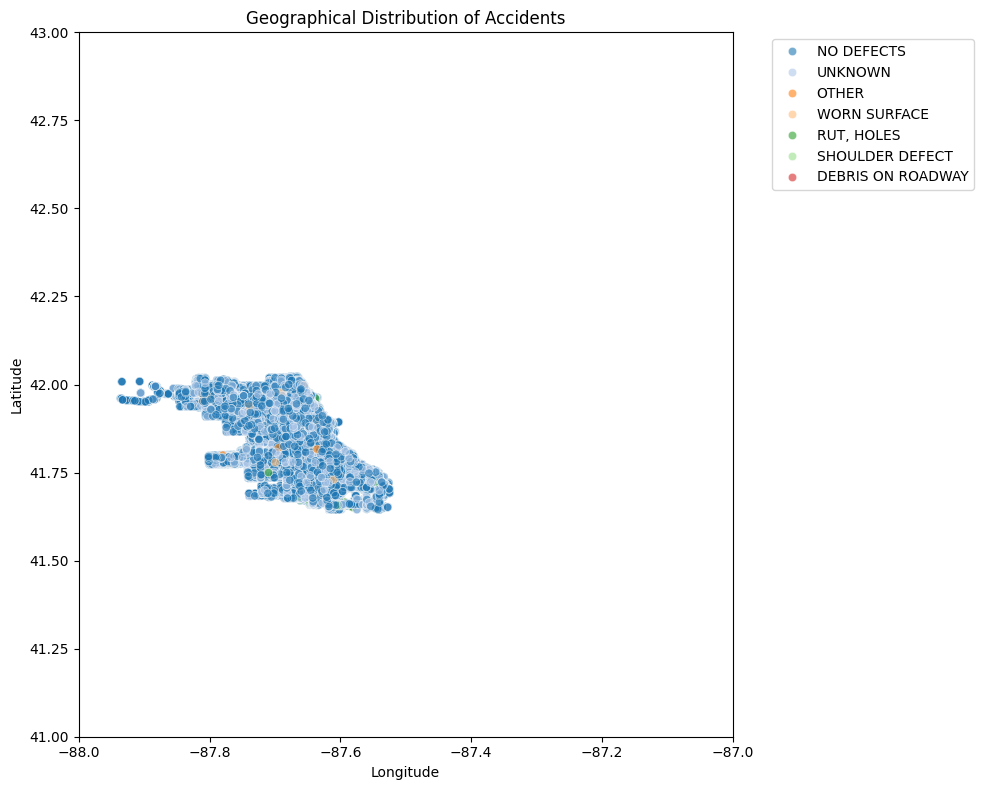

In [46]:
# Plot a scatter plot for geographical distribution
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, hue='ROAD_DEFECT', palette='tab20', alpha=0.6)
plt.title('Geographical Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim([41, 43])
plt.xlim([-88, -87])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

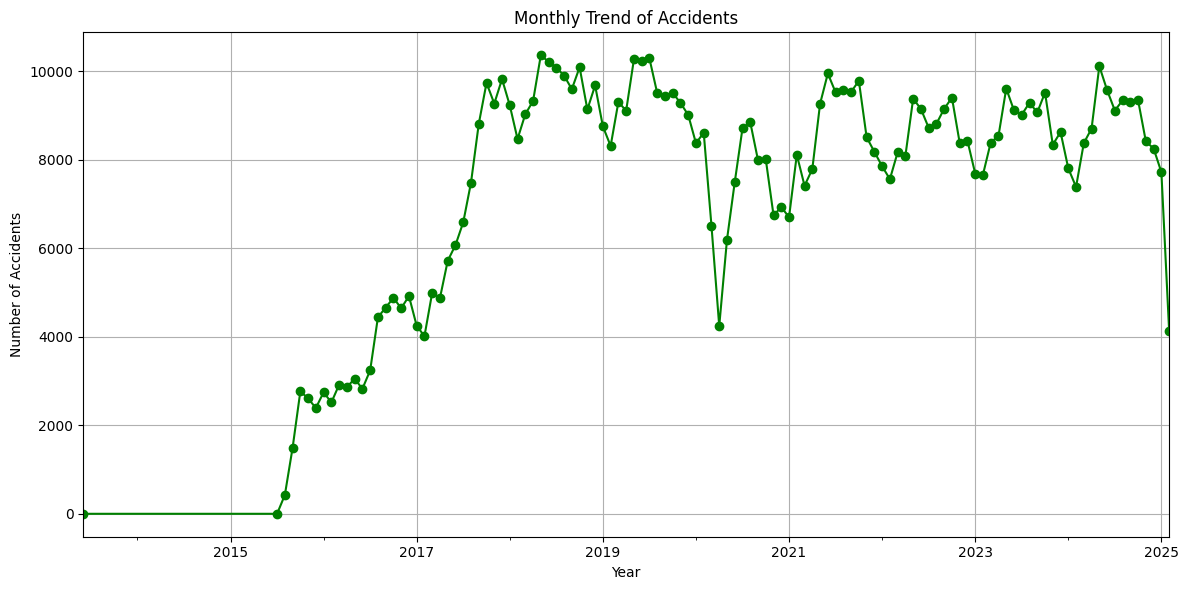

In [70]:
df['Police Date'] = pd.to_datetime(df['Police Date'])
df['Crash Month'] = df['Police Date'].dt.to_period('M')


monthly_counts = df['Crash Month'].value_counts().sort_index()

# Plot a line graph
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color='g')
plt.title('Monthly Trend of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

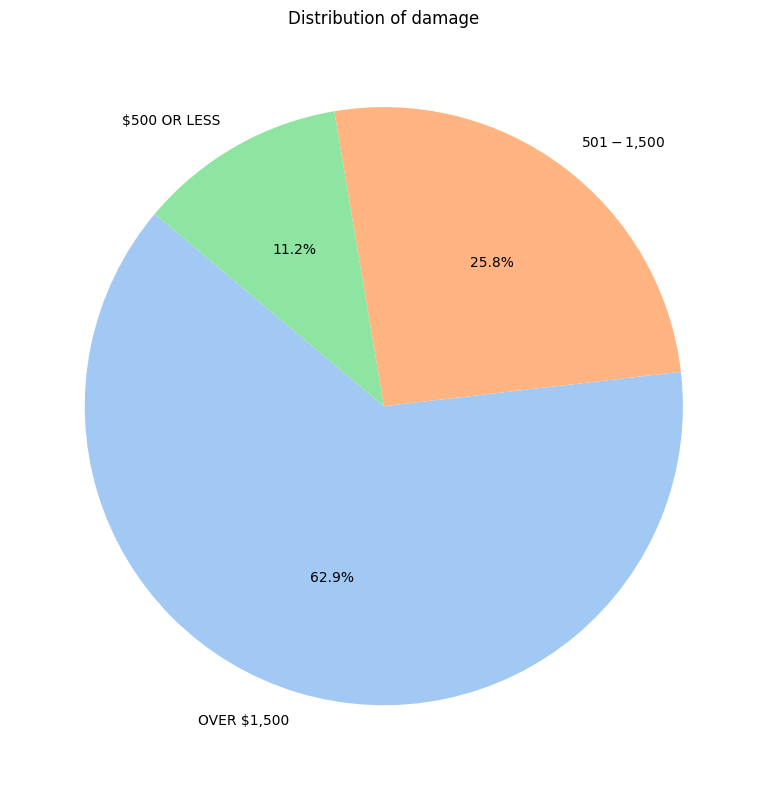

In [49]:
offence_counts = df['DAMAGE'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(offence_counts, labels=offence_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of damage')
plt.tight_layout()
plt.show()

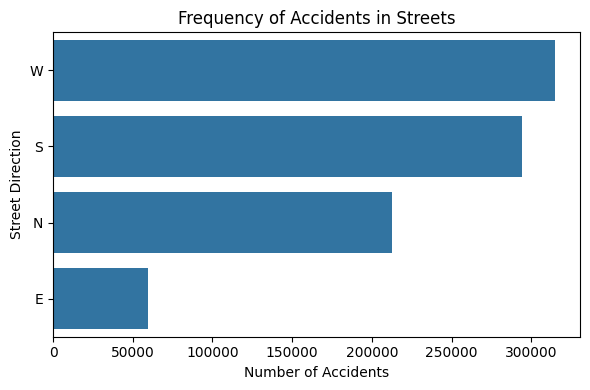

In [53]:
location_counts = df['STREET_DIRECTION'].value_counts()

# Plot a bar graph
plt.figure(figsize=(6, 4))  # Adjust figure size for horizontal bars
sns.barplot(x=location_counts.values, y=location_counts.index, orient='h')
plt.title('Frequency of Accidents in Streets')
plt.xlabel('Number of Accidents')
plt.ylabel('Street Direction')
plt.tight_layout()
plt.show()

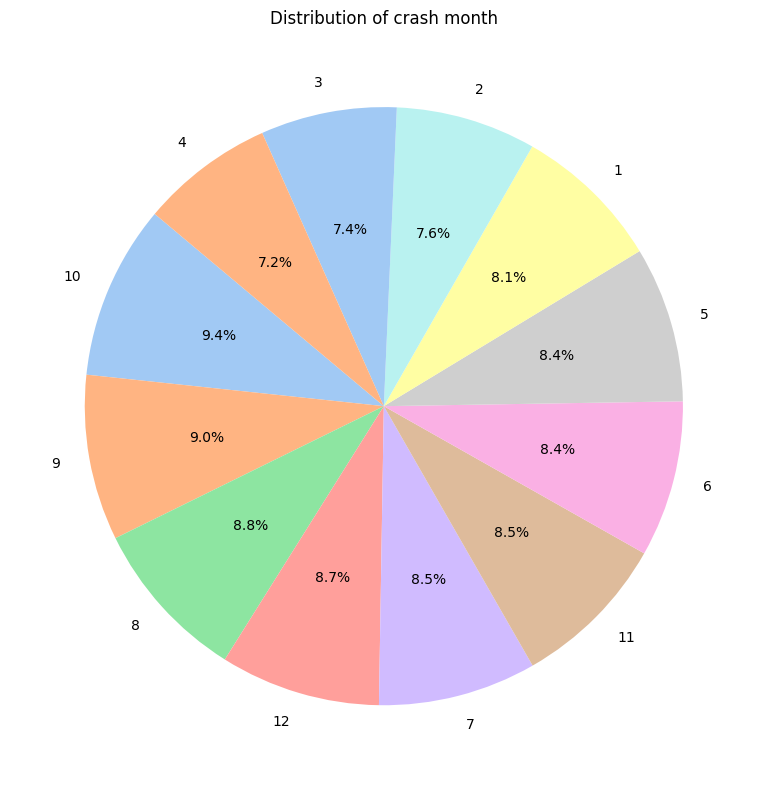

In [52]:
offence_counts = df['CRASH_MONTH'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(offence_counts, labels=offence_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of crash month')
plt.tight_layout()
plt.show()

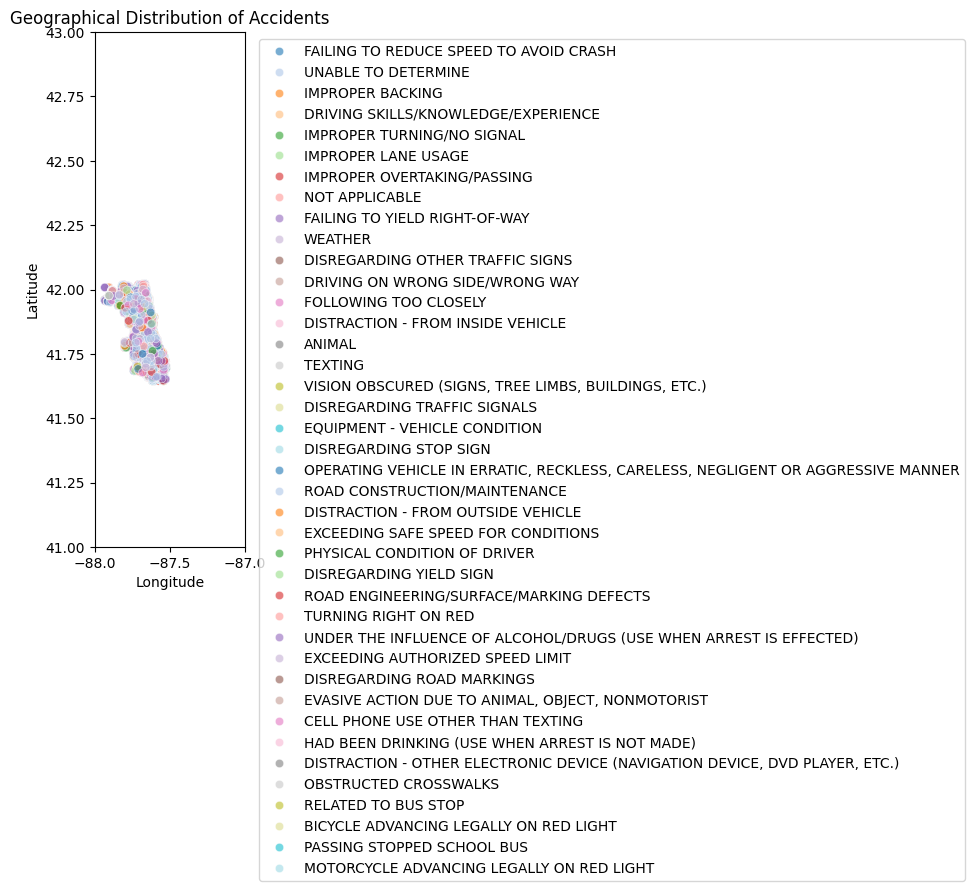

In [54]:
# Plot a scatter plot for geographical distribution
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, hue='PRIM_CONTRIBUTORY_CAUSE', palette='tab20', alpha=0.6)
plt.title('Geographical Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim([41, 43])
plt.xlim([-88, -87])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

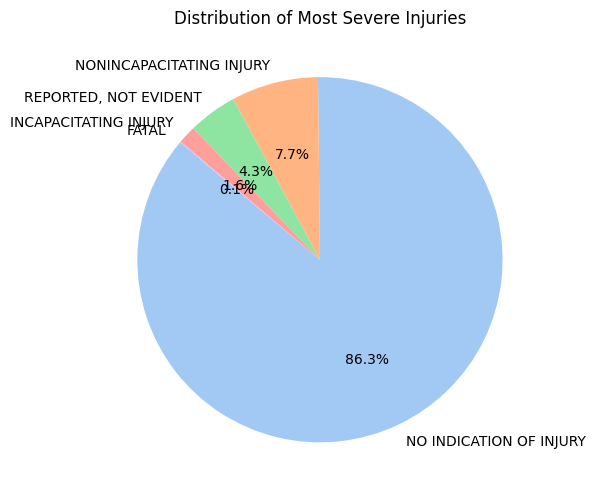

In [62]:
offence_counts = df['MOST_SEVERE_INJURY'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(offence_counts, labels=offence_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Most Severe Injurie')
plt.tight_layout()
plt.show()

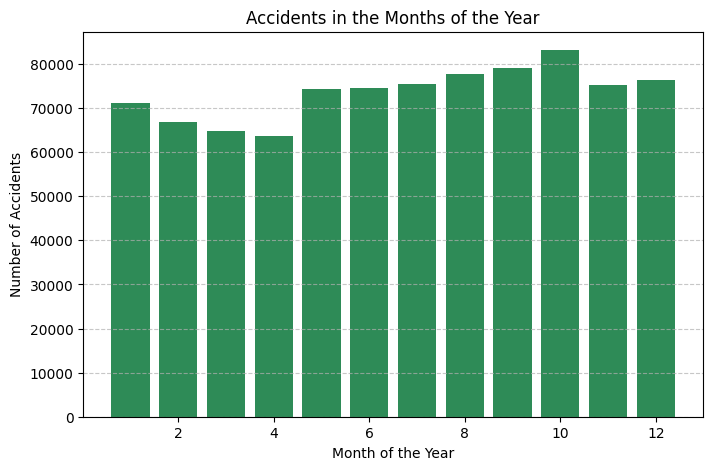

CRASH_MONTH
10    83140
9     78966
8     77599
12    76351
7     75357
11    75132
6     74485
5     74197
1     71052
2     66769
3     64890
4     63657
Name: count, dtype: int64

In [69]:
days_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


day_counts = df["CRASH_MONTH"].value_counts()


# Plot
plt.figure(figsize=(8, 5))
plt.bar(day_counts.index, day_counts.values, color="seagreen")
plt.xlabel("Month of the Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents in the Months of the Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
day_counts


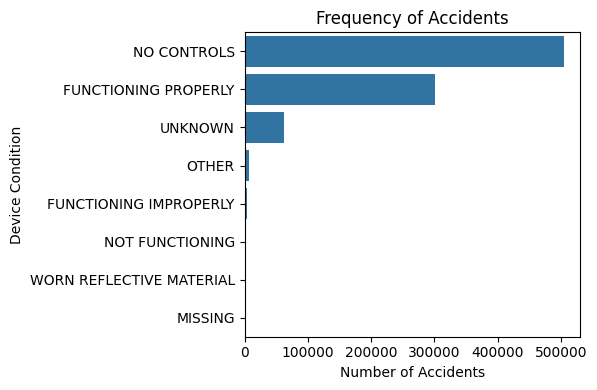

In [71]:
location_counts = df['DEVICE_CONDITION'].value_counts()

# Plot a bar graph
plt.figure(figsize=(6, 4))  # Adjust figure size for horizontal bars
sns.barplot(x=location_counts.values, y=location_counts.index, orient='h')
plt.title('Frequency of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Device Condition')
plt.tight_layout()
plt.show()

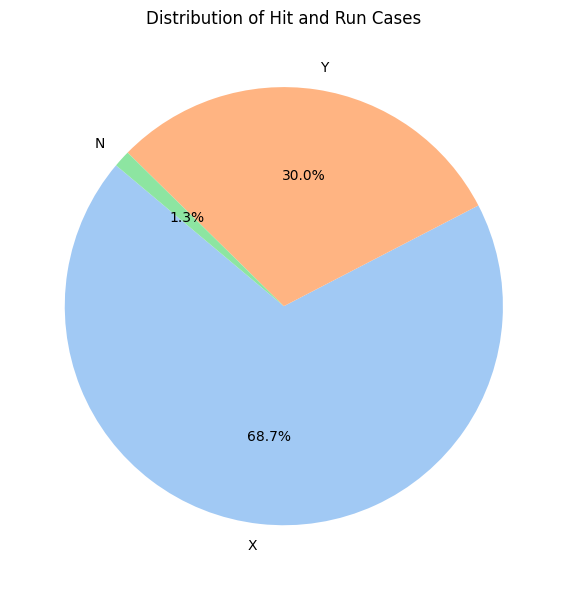

In [74]:
offence_counts = df['HIT_AND_RUN_I'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(offence_counts, labels=offence_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Hit and Run Cases')
plt.tight_layout()
plt.show()

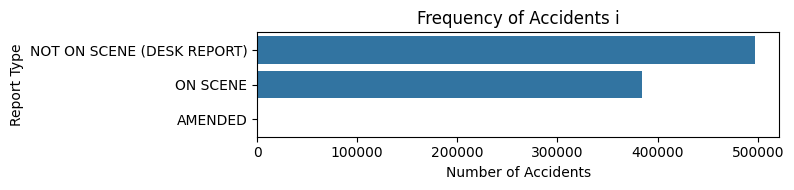

In [80]:
location_counts = df['REPORT_TYPE'].value_counts()

# Plot a bar graph
plt.figure(figsize=(8, 2))  # Adjust figure size for horizontal bars
sns.barplot(x=location_counts.values, y=location_counts.index, orient='h')
plt.title('Frequency of Accidents i')
plt.xlabel('Number of Accidents')
plt.ylabel('Report Type')
plt.tight_layout()
plt.show()